In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

1. Download the MNIST dataset and load it
2. The MNIST images are **28X28** pixels **784** total pixels
3. The data is already split into 60000 *training* data and 10000 *testing* data

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Print the images to test, note the MNIST dataset is a set of **greyscale** images. \
Passing the `cmap='gray'` tells `matplotlib` to render accordingly

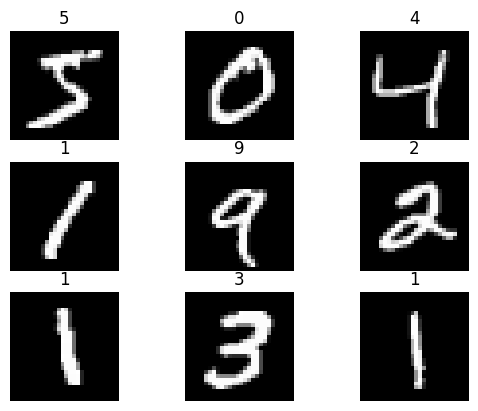

In [36]:
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(9):
    plt.subplot(3,3,1 + i)
    plt.title(names[int(y_train[i])])
    plt.axis("off")
    plt.imshow(x_train[i], cmap='gray')
plt.show()

Feature scaling the pixels in images

In [17]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

Change the *testing* and *training* samples to 1D Array to have it 28 X 28 = 784 Features. Each pixel will be a feature

In [18]:
nsamples, nx, ny = x_train_scaled.shape
x_train_scaled_1d = x_train_scaled.reshape(nsamples, nx*ny)

nsamples, nx, ny = x_test.shape
x_test_scaled_1d = x_test_scaled.reshape(nsamples, nx*ny)
x_train_scaled_1d.shape

(60000, 784)

In [19]:
model = RandomForestClassifier()
model.fit(x_train_scaled_1d, np.ravel(y_train))

RandomForestClassifier()

In [20]:
y_hat = model.predict(x_test_scaled_1d)

print(y_hat[:10])
print(np.ravel(y_test)[:10])

print("Accuracy:", accuracy_score(y_test, y_hat))

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
Accuracy: 0.9701


##### To Test: #####
1. Read the images
2. Convert image to grayscale as the MNIST data set is B/W
3. Resize the image to make it 28X28 pixels so that it matches the MNIST Dataset
4. Apply Thresholding to convert grayscale images to B/W
5. Identify if the image is inverted, if not invert it so that the background is black and the text is white
    1. Count the non zero pixels (Since it has been through thresholding, it will either be black [0] or white [255])
    2. Remaining pixels are the black pixels
    3. If White pixels>Black pixels, the image is probably having a white background
    4. Invert it if white background
6. Scale the image
7. Ask the model to predict it

In [47]:
import cv2
test_img_o = cv2.imread('./test1.png')
test_img_rgb = cv2.cvtColor(test_img_o, cv2.COLOR_BGR2RGB)
#Greyscale the image
gray_image = cv2.cvtColor(test_img_rgb, cv2.COLOR_BGR2GRAY)

# Apply thresholding (Otsu's Binarization: Automatically calculates an optimal threshold value from the image histogram.)
retval, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Count white pixels and black pixels
num_white_pixels = cv2.countNonZero(binary_image)
num_black_pixels = binary_image.size - num_white_pixels

# Check if the image has a white background and black letters
if num_white_pixels > num_black_pixels:
    # Invert the colors of the image
    inverted_image = cv2.bitwise_not(binary_image)
    # Update the binary image
    test_image = inverted_image
else: 
    test_image = binary_image

test_img_o_resized = cv2.resize(test_image, (28, 28))
binary_image_scaled = test_img_o_resized/255.0
nx, ny = binary_image_scaled.shape
binary_image_scaled_1d = binary_image_scaled.reshape(1, (nx*ny))
y_hat = model.predict(binary_image_scaled_1d)
print(names[y_hat[0]])

9


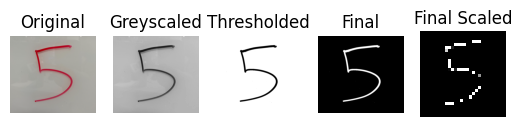

In [45]:
plt.subplot(1,5,1)
plt.title("Original")
plt.axis("off")
plt.imshow(test_img_rgb)

plt.subplot(1,5,2)
plt.title("Greyscaled")
plt.axis("off")
plt.imshow(gray_image, cmap='gray')

plt.subplot(1,5,3)
plt.title("Thresholded")
plt.axis("off")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1,5,4)
plt.title("Final")
plt.axis("off")
plt.imshow(test_image, cmap='gray')

plt.subplot(1,5,5)
plt.title("Final Scaled")
plt.axis("off")
plt.imshow(binary_image_scaled, cmap='gray')